### Description: This is a statetment analysis program that parse the tweet fom tweets using Python

<img src='https://editor.analyticsvidhya.com/uploads/61727sentiment-fig-1-689.jpeg'>

In [31]:
#importing important libraries

import pandas as pd
import numpy as np

from textblob import TextBlob
from wordcloud import WordCloud

import tweepy
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
#change the form of the plots
plt.style.use('fivethirtyeight')

In [3]:
#loading the data
from google.colab import files
uploaded=files.upload()

Saving tweeter api key.csv to tweeter api key.csv


In [33]:
df=pd.read_csv("tweeter api key.csv")


In [36]:
#Twetter API credentials
consumer_key=df['Key'][0]
consumer_secret_key=df['Key'][1]
access_token=df['Key'][3]
access_token_secret=df['Key'][4]


In [37]:
#creating the othentication object
authentication=tweepy.OAuthHandler(consumer_key,consumer_secret_key)

#set the access token and access token secret
authentication.set_access_token(access_token,access_token_secret)

#creat the API object while passing the auth information
api=tweepy.API(authentication, wait_on_rate_limit=True)

In [74]:
#extracting 150 tweets from the tweeter user
posts=api.user_timeline(screen_name="BillGates", count=150, lang="en", tweet_mode="extended")

#Print the last five tweets from the account
print('Showing the last 5 tweets:\n')
num=1
for tweet in posts[0:5]:
  print(num,')', tweet.full_text+'\n')
  num=num+1

Showing the last 5 tweets:

1 ) As India celebrates its 75th Independence Day, I congratulate @narendramodi for prioritizing healthcare and digital transformation while spearheading India’s development. India's progress in these sectors is inspiring and we are fortunate to partner in this journey #AmritMahotsav

2 ) While our fight against climate change is far from over, I’m more optimistic than ever that by working together, we can make a net-zero future of abundant, affordable, and clean energy a reality to people everywhere.

3 ) This $369 billion investment will spark innovation, drive job creation, and reduce energy prices and emissions. It sets a clear example of what serious climate action looks like.

4 ) The Inflation Reduction Act’s passage through Congress is nothing short of extraordinary. The United States is taking a historic step towards the clean energy economy we need to meet our climate goals.

5 ) In the past decade, @OERProject has reached more than 1 million stude

In [75]:
# Create a dataframe with a column called Tweets

df_tweets=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweet'])

#showing the first 5 tweet data
df_tweets.head()

,Tweet
0,"As India celebrates its 75th Independence Day,..."
1,While our fight against climate change is far ...
2,This $369 billion investment will spark innova...
3,The Inflation Reduction Act’s passage through ...
4,"In the past decade, @OERProject has reached mo..."


In [76]:
#Creating a function to clean the tweets
def clean(text):
  text=re.sub(r'@[A-Za-z0-9]+','', str(text))#it removes @mentions
  text=re.sub(r'#','', str(text))#removeing '#' symbol from text
  text=re.sub(r':','', str(text))#removeing ':' symbol from text
  text=re.sub(r'RT[\S]+','', str(text))#removing RT(Re Tweet) tagged with the text
  text=re.sub(r'http\S+', '', text)#remove the hyper link
  #we put '?' after s in 'https' because it can be 'http' so '?' will take 's' as 0 or 1 
  #i.e- no matter if 's' condition is fullfilled or not it will remove it
  #r tells the python that it is a raw string
  return text


In [77]:
#Cleaning the text
df_tweets['Tweet']=df_tweets['Tweet'].apply(clean)

#showing cleaned text
df_tweets

,Tweet
0,"As India celebrates its 75th Independence Day,..."
1,While our fight against climate change is far ...
2,This $369 billion investment will spark innova...
3,The Inflation Reduction Act’s passage through ...
4,"In the past decade, has reached more than 1 m..."
...,...
145,What a day! I had a great time in London chatt...
146,"Thanks, for the thoughtful conversation. I al..."
147,If we’re going to make COVID-19 the last pande...
148,"My new book, How to Prevent the Next Pandemic,..."


In [78]:
df_tweets.head()

,Tweet
0,"As India celebrates its 75th Independence Day,..."
1,While our fight against climate change is far ...
2,This $369 billion investment will spark innova...
3,The Inflation Reduction Act’s passage through ...
4,"In the past decade, has reached more than 1 m..."


In [79]:
#creatting a function to create subjectivity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creating function for checking polarity
def GetPolarity(text):
  return TextBlob(text).sentiment.polarity

In [80]:
#Creating two new columns
df_tweets['Subjectivity']=df_tweets['Tweet'].apply(get_subjectivity)
df_tweets['Polarity']=df_tweets['Tweet'].apply(GetPolarity)

In [81]:
#Shawing new dataset
df_tweets

,Tweet,Subjectivity,Polarity
0,"As India celebrates its 75th Independence Day,...",0.566667,0.300000
1,While our fight against climate change is far ...,0.655000,0.313333
2,This $369 billion investment will spark innova...,0.383333,-0.044444
3,The Inflation Reduction Act’s passage through ...,0.500000,0.175000
4,"In the past decade, has reached more than 1 m...",0.401515,0.128788
...,...,...,...
145,What a day! I had a great time in London chatt...,0.602273,0.468182
146,"Thanks, for the thoughtful conversation. I al...",0.585714,0.303571
147,If we’re going to make COVID-19 the last pande...,0.066667,0.000000
148,"My new book, How to Prevent the Next Pandemic,...",0.284848,0.178788


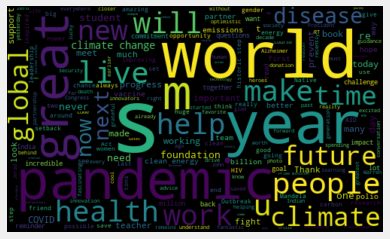

In [82]:
# Plotting Word Cloud
all_words=' '.join([tweet for tweet in df_tweets['Tweet']])
word_cloud=WordCloud(width=500, height=300, max_font_size=119, random_state=21).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')#'plt.imshow' Display data as an image, i.e., on a 2D regular raster.
plt.axis('off')
plt.show()

In [83]:
#Create a function to compute the negetive, positive and nutral analysis
def get_sentiments(polarity):
  if polarity<0:
    return 'Negetive'
  elif polarity==0:
    return 'Nutral'
  else:
    return 'Positive'
    


In [84]:
#Creating a new sentiments columns
df_tweets['Sentiments']=df_tweets['Polarity'].apply(get_sentiments)

In [85]:
#showing the data
df_tweets.head(10)

,Tweet,Subjectivity,Polarity,Sentiments
0,"As India celebrates its 75th Independence Day,...",0.566667,0.300000,Positive
1,While our fight against climate change is far ...,0.655000,0.313333,Positive
2,This $369 billion investment will spark innova...,0.383333,-0.044444,Negetive
3,The Inflation Reduction Act’s passage through ...,0.500000,0.175000,Positive
4,"In the past decade, has reached more than 1 m...",0.401515,0.128788,Positive
5,Prime Minister Shinzo Abe understood that impr...,0.678571,0.261905,Positive
6,"Wow, I’m blown away by your support.",1.000000,0.100000,Positive
7,"“Outbreaks are inevitable, but pandemics are o...",0.337500,-0.062500,Negetive
8,If you want to help teachers and students in t...,0.513889,0.236111,Positive
9,Teachers deserve our thanks – and support. I’m...,0.100000,0.100000,Positive


In [88]:
df_tweets['Sentiments'].value_counts()

Positive    115
Nutral       29
Negetive      6
Name: Sentiments, dtype: int64

In [89]:
#Printing negative tweets
for i,e in enumerate(df_tweets['Sentiments']):
  if e=='Negetive':
    print(i,')',df_tweets['Tweet'][i])

2 ) This $369 billion investment will spark innovation, drive job creation, and reduce energy prices and emissions. It sets a clear example of what serious climate action looks like.
7 ) “Outbreaks are inevitable, but pandemics are optional.” – 

This  video gives you a glimpse of how Big History is helping students connect the present to the past  
37 ) If we had stopped the COVID pandemic in less than 100 days, we could’ve saved over 98% of the lives lost. Here’s how we can prevent it from happening again  
39 ) As I look to the future, I plan to give virtually all of my wealth to the foundation. I will move down and eventually off of the list of the world’s richest people.
50 ) Prime Minister Abe was a friend and partner of our foundation who helped save lives around the world by championing universal health coverage and programs like the Global Fund. I’m shocked and saddened by his death.
74 ) Yesterday, I had a chance to spend the day focusing on climate – and the innovations that

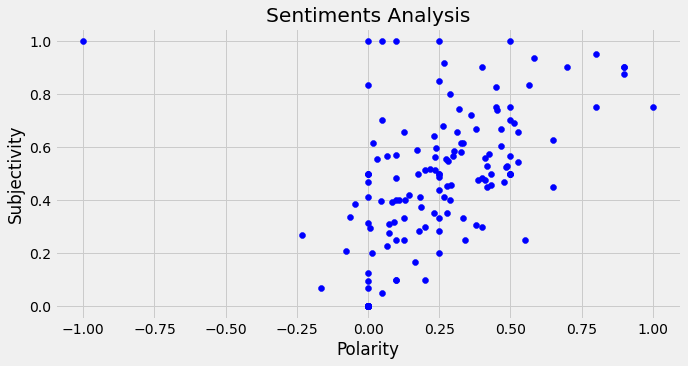

In [94]:
#Ploting the polarity and the Subjectivity 
plt.figure(figsize=(10,5))
for i in range(0,df_tweets.shape[0]):
  plt.scatter(df_tweets['Polarity'][i],df_tweets['Subjectivity'][i], color='blue')
plt.title('Sentiments Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [117]:
#get the percentage of positive tweets
total_tweets=df_tweets.shape[0]
total_positive_tweets=df_tweets['Sentiments'].value_counts()[0]
PR=total_positive_tweets/total_tweets*100
print('Total percentage of positive tweets is ',round(PR,2),'%')

Total percentage of positive tweets is  76.67 %


In [122]:
#get the negetive of positive tweets
total_tweets=df_tweets.shape[0]
total_negetive_tweets=df_tweets['Sentiments'].value_counts()[2]
PR=total_negetive_tweets/total_tweets*100
print('Total percentage of negetive tweets is ',round(PR,2),'%')

Total percentage of negetive tweets is  4.0 %


Text(0.5, 0, 'Sentiments')

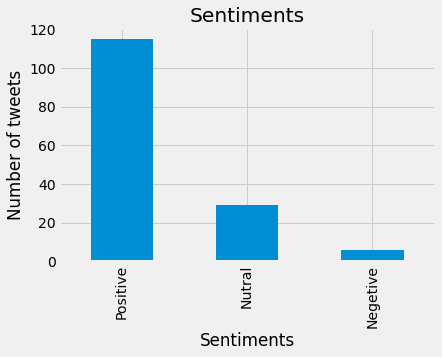

In [125]:
df_tweets['Sentiments'].value_counts().plot(kind='bar')
plt.title('Sentiments')
plt.ylabel('Number of tweets')
plt.xlabel('Sentiments')